# Exploratory Data Analysis

## Prerequisites

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# helper functions for plotting
!pip install -q --upgrade git+https://github.com/goerlitz/dataplot.git

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import dataplot.pandas as dp
from pathlib import Path

## Download Data

Fetch the preprocessed 10k German News Articles Dataset.

In [4]:
%env DIR=../../data

!mkdir -p $DIR
!wget -nc https://github.com/tblock/10kGNAD/blob/master/train.csv?raw=true -nv -O $DIR/train.csv
!wget -nc https://github.com/tblock/10kGNAD/blob/master/test.csv?raw=true -nv -O $DIR/test.csv
!ls -lAh $DIR | cut -d " " -f 5-

env: DIR=../../data

2,7M Apr 29 14:36 test.csv
 24M Apr 29 14:36 train.csv


## Load Data

In [5]:
data_path = Path('../../data/')

train_file = data_path / "train.csv"
test_file = data_path / "test.csv"

In [6]:
def load_10kGNAD(filepath: Path, columns: list=["labels", "text"]) -> pd.DataFrame:
    """Load 10kGNAD-specific data format from CVS file."""
    f = pd.read_csv(filepath, sep=";", quotechar="'", names=columns)
    return f

In [7]:
train_df = load_10kGNAD(train_file).assign(split="train")
valid_df = load_10kGNAD(test_file).assign(split="test")

# combine training and test data
text_df = pd.concat([train_df, valid_df], ignore_index=True)

# count text length
text_df["length"] = text_df.text.map(len)

print(f"{text_df.shape[0]:,} articles")
display(text_df.head())

10,273 articles


,labels,text,split,length
0,Sport,21-Jähriger fällt wohl bis Saisonende aus. Wie...,train,448
1,Kultur,"Erfundene Bilder zu Filmen, die als verloren g...",train,4020
2,Web,Der frischgekürte CEO Sundar Pichai setzt auf ...,train,2116
3,Wirtschaft,"Putin: ""Einigung, dass wir Menge auf Niveau vo...",train,664
4,Inland,Estland sieht den künftigen österreichischen P...,train,4393


## Exploratory Data Analysis

Analyze
* Split of Training and Test data
* Article Topics
* Article Length

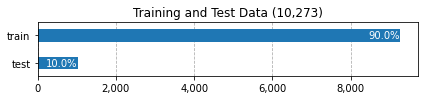

In [8]:
dp.countplot(text_df, "split", annotate="percent", figsize=(6,1.5), title=f"Training and Test Data ({text_df.shape[0]:,})");

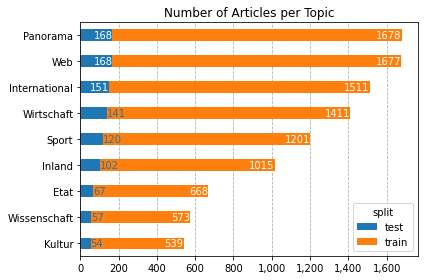

In [9]:
dp.countplot(text_df, "labels", by="split", title="Number of Articles per Topic", annotate="value");

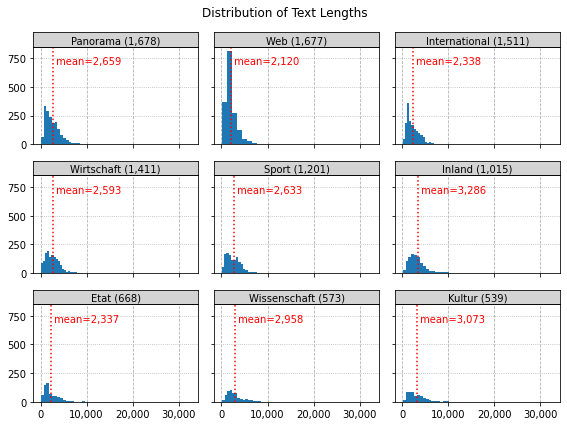

In [10]:
dp.histplot(text_df, "length", by="labels", bins=30, title="Distribution of Text Lengths", annotate="mean", figsize=(8,6));